In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
dataset_train = pd.read_csv('/content/wine_data.csv')


In [34]:
wine_data = dataset_train.values


In [5]:
missing_values = np.isnan(wine_data).sum(axis=0)
print("Missing Values:\n", missing_values)

Missing Values:
 [0 0 0 0 0 0 1 0 1 0 0 1]


<ipython-input-20-3bc0a5d32ef3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data_df, palette='viridis')


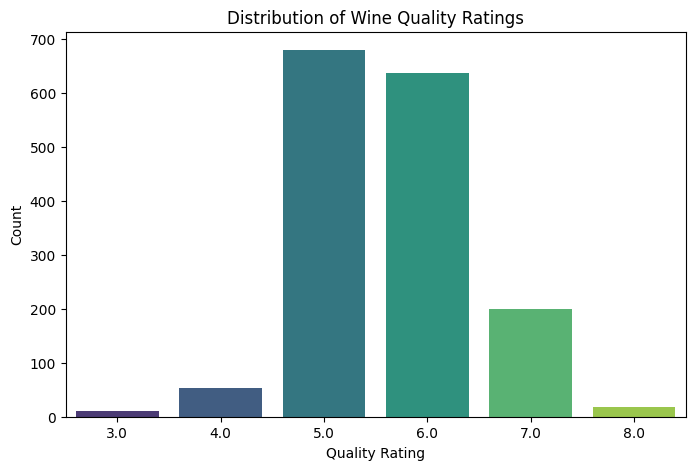

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_data_df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

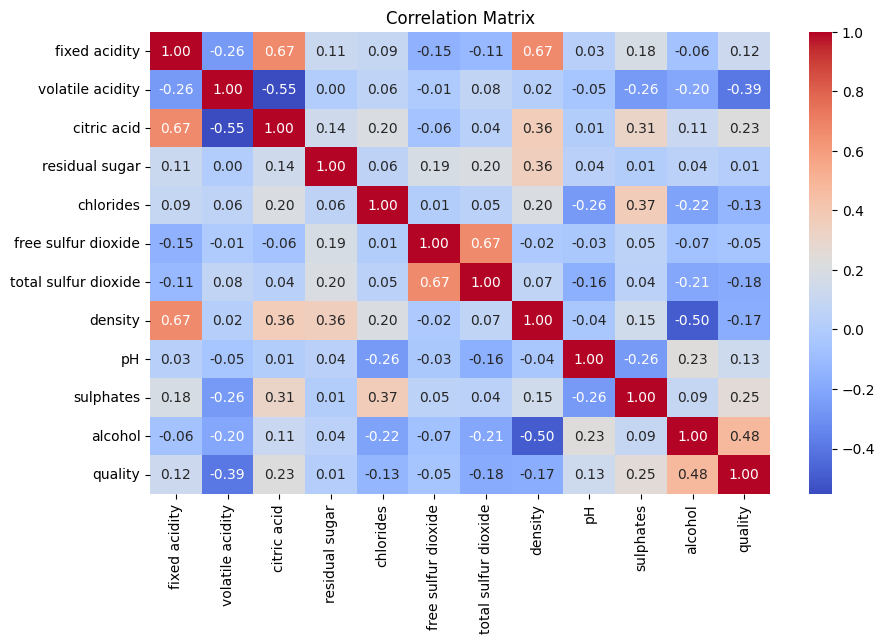

In [27]:
correlation_matrix = wine_data_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [49]:
imputer = SimpleImputer(strategy='mean')
X = wine_data_df.drop('quality', axis=1)
y = wine_data_df['quality']
X_imputed = imputer.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [55]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [56]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (319, 11)
Shape of y_test: (319,)


In [67]:
y_test = y_test[~y_test.isnull()]


In [69]:
y_pred = rf_classifier.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.658307210031348


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        10
         5.0       0.70      0.76      0.73       129
         6.0       0.62      0.70      0.66       132
         7.0       0.67      0.48      0.56        42
         8.0       0.00      0.00      0.00         5

    accuracy                           0.66       319
   macro avg       0.33      0.32      0.32       319
weighted avg       0.63      0.66      0.64       319



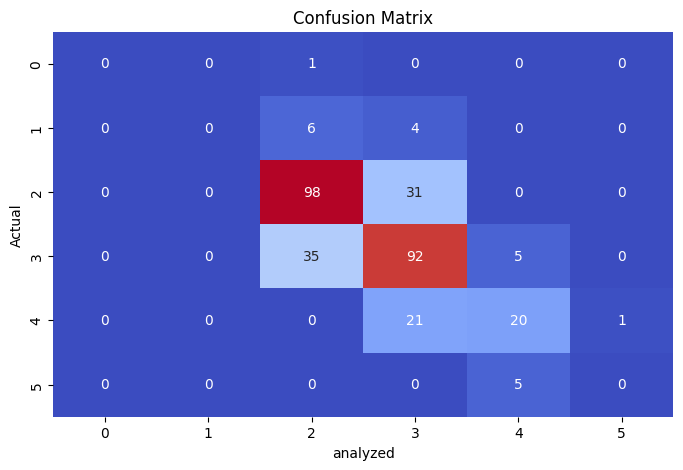

In [72]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('analyzed')
plt.ylabel('Actual')
plt.show()